In [1]:
from receptive_fields.util.image import gabor_kernel
from matplotlib import pyplot as plt
from numpy import random
import numpy as np
from scipy import ndimage
from torch.nn.functional import elu, relu, tanh, gelu
import torch

In [2]:
def random_gabor(shape = (32, 32)):
    return gabor_kernel(
        shape=shape,
        frequency=1/random.normal(loc=shape[0]/2, scale=shape[0]/4),
        theta=random.uniform(0,np.pi),
        sigma_x=random.uniform(2,shape[0]/2),
        sigma_y=random.uniform(2,shape[1]/2),
        phase_offset=random.uniform(0, np.pi),
        center_offset=(0,0)#(random.uniform(0, shape[0]/2),random.uniform(0, shape[1]/2))
    )

In [3]:
def random_noise(shape = (32, 32)):
    return random.random(shape)-0.5

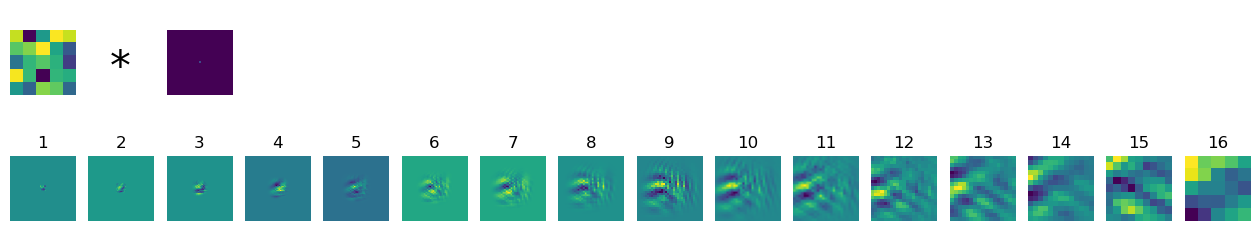

In [32]:
with torch.no_grad():
    kernel_size = 5
    stride = 1
    n_convolutions = 16
    max_imgs_per_line = 16

    conv = torch.nn.Conv2d(1,1,kernel_size=kernel_size, padding=0, stride=stride, dtype=torch.double)
    inp_size = kernel_size + (kernel_size-1)*n_convolutions
    img = ndimage.zoom(random_noise((inp_size, inp_size)), 1, order=0)
    img = np.zeros_like(img)
    img[img.shape[0]//2,img.shape[1]//2] = 1
    # conv.weight[0,0]=torch.from_numpy(img)

    n_rows = 1 + np.ceil(n_convolutions / max_imgs_per_line).astype(int)
    fig, ax = plt.subplots(
        n_rows,
        max_imgs_per_line,
        figsize=(
            max_imgs_per_line,
            n_rows+1,
        ),
    )
    ax[0, 0].imshow(conv.weight[0,0])
    ax[0, 1].text(0.5, 0.5, "*", fontsize=30, fontstyle='oblique')
    ax[0, 1].set_xlim(0,1.5)
    ax[0, 1].set_ylim(0,1.5)
    ax[0, 2].imshow(img)
    for cur_ax in ax.flat:
        cur_ax.axis("off")
    img = torch.from_numpy(img)[None] #conv.weight[0]
    for i in range(n_convolutions):
        conv = torch.nn.Conv2d(1,1,kernel_size=kernel_size, padding=0, stride=1, dtype=torch.double)
        # img = ndimage.convolve(img, conv, mode="constant", cval=0.0)
        img = conv(img)
        # img = elu(img)
        img = img - img.mean()
        cur_ax = ax[1 + i // max_imgs_per_line, i % max_imgs_per_line]
        cur_ax.imshow(img[0])
        cur_ax.set_title(str(i+1))